In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv("../../data/books.csv")
train = pd.read_csv("../../data/train_ratings.csv")
test = pd.read_csv("../../data/test_ratings.csv")
users = pd.read_csv("../../data/users.csv")
sub = pd.read_csv("../../data/sample_submission.csv")

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
users.isna().sum()/len(users)

user_id     0.000000
location    0.000000
age         0.408756
dtype: float64

In [5]:
users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거

users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

users = users.replace('na', np.nan) #특수문자 제거로 n/a가 na로 바뀌게 되었습니다. 따라서 이를 컴퓨터가 인식할 수 있는 결측값으로 변환합니다.
users = users.replace('', np.nan) # 일부 경우 , , ,으로 입력된 경우가 있었으므로 이런 경우에도 결측값으로 변환합니다.

C:\Users\suyeon\AppData\Local\Temp\ipykernel_21552\3844664685.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거


In [6]:
users.head()

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",NaN,timmins,ontario,canada
1,11400,"ottawa,ontario,canada",49.0,ottawa,ontario,canada
2,11676,"na,na,na",NaN,NaN,NaN,NaN
3,67544,"toronto,ontario,canada",30.0,toronto,ontario,canada
4,85526,"victoria,britishcolumbia,canada",36.0,victoria,britishcolumbia,canada


In [7]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state       3254
location_country     2124
dtype: int64

In [8]:
users['age'].value_counts()

29.0    1290
26.0    1250
25.0    1243
34.0    1215
27.0    1207
        ... 
86.0       1
94.0       1
89.0       1
98.0       1
92.0       1
Name: age, Length: 91, dtype: int64

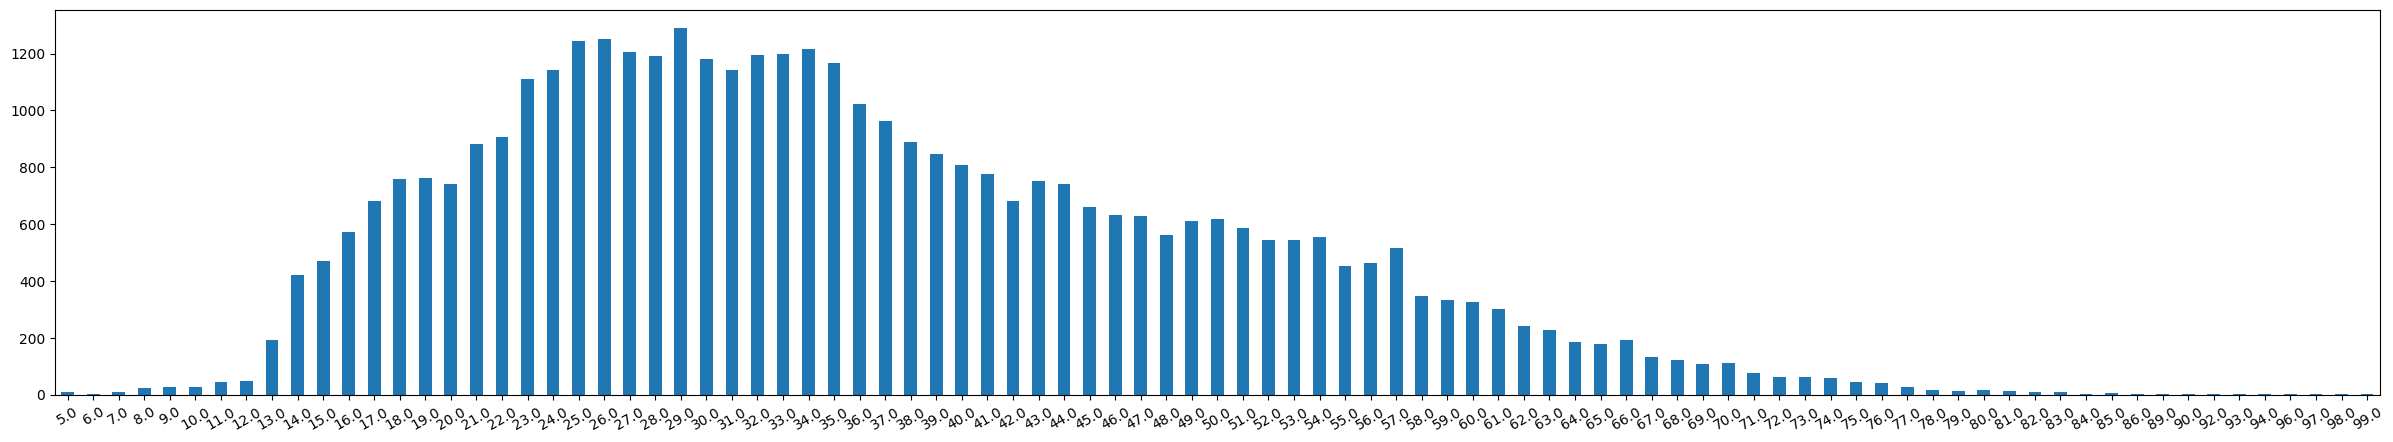

In [9]:
plt.figure(figsize=(30,5))
users['age'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=30)
plt.show()

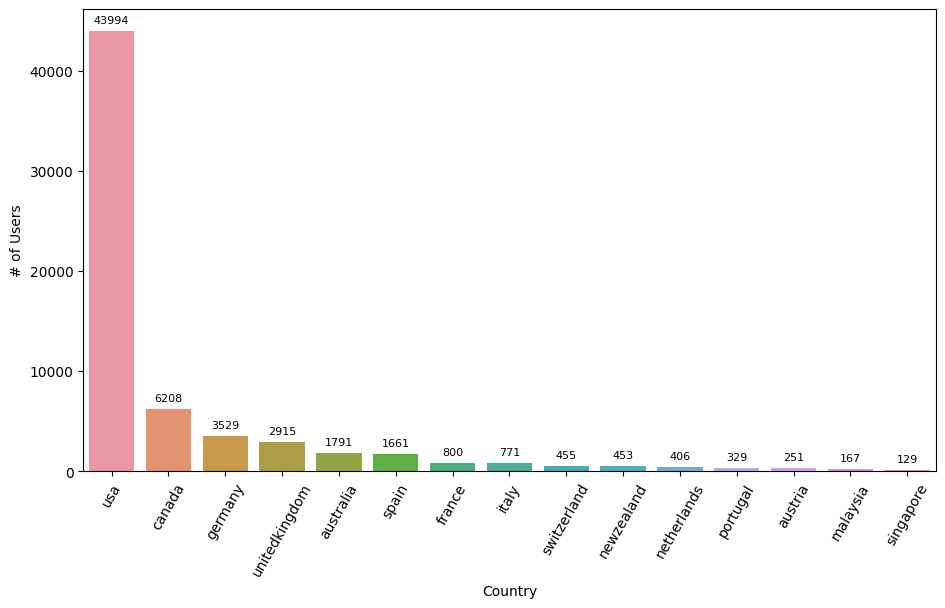

In [10]:
my_dict=(users['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
# f.drop(7,inplace=True)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

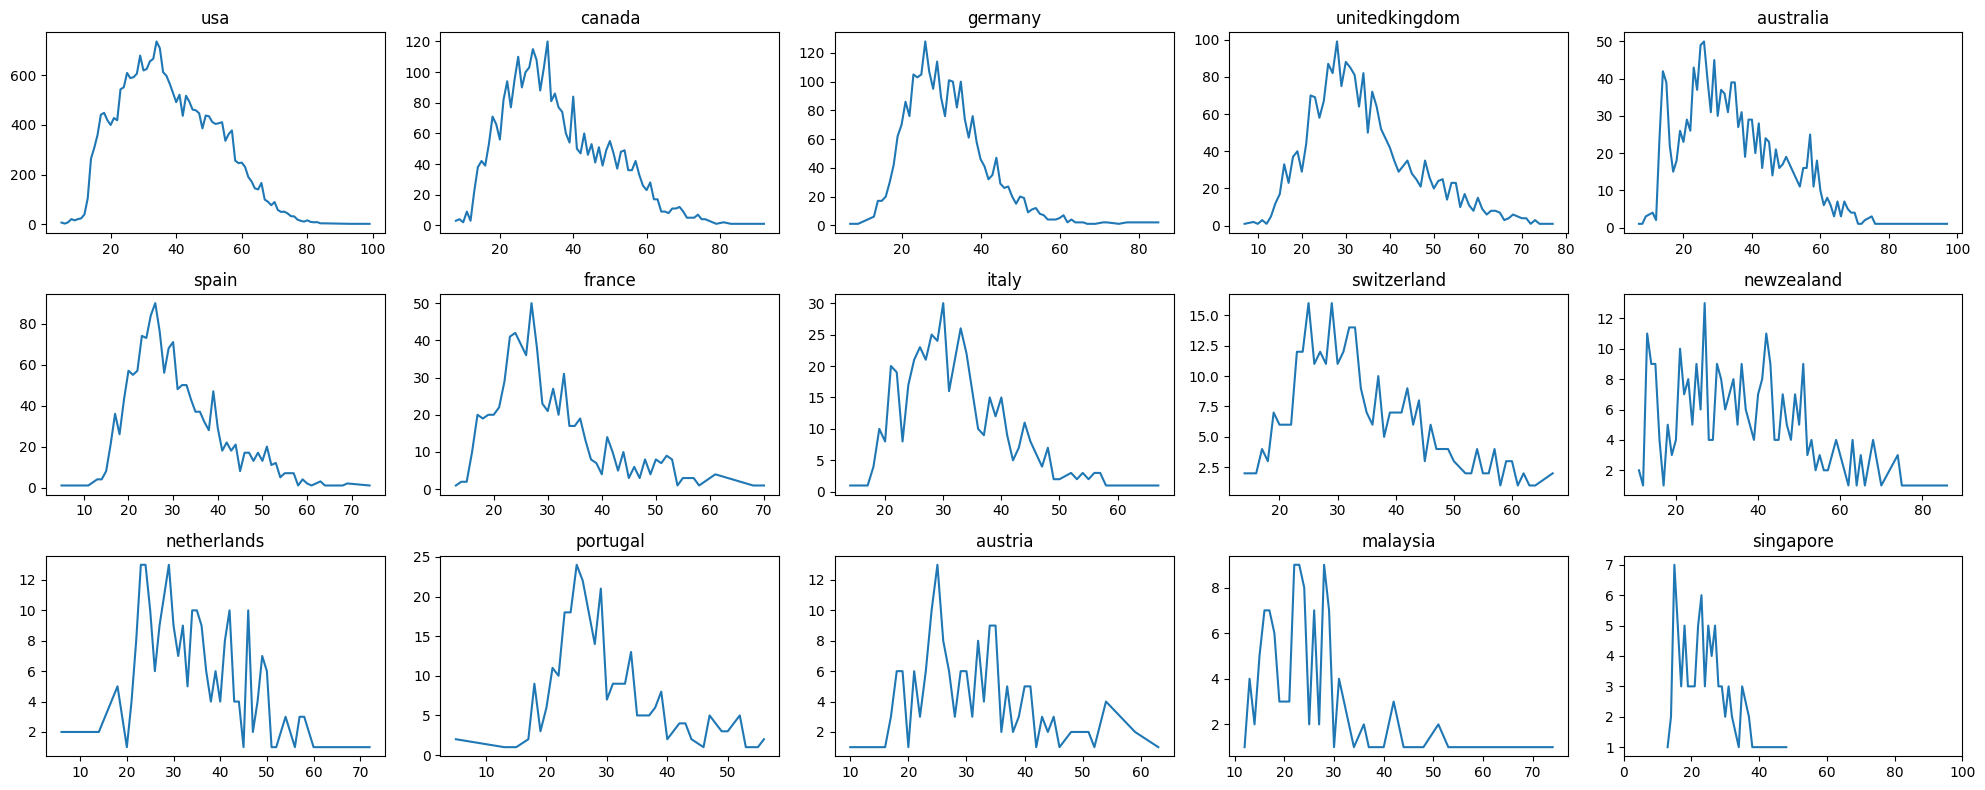

In [11]:
fig, ax = plt.subplots(3,5,figsize=(20,8))
for country, ax_ in zip(f['location_country'], ax.flatten()):
    users[(users['location_country']==country)]['age'].value_counts().sort_index().plot(ax=ax_, title=country)
plt.xlim(0,100)
plt.tight_layout()
plt.show()

In [12]:
users[users['age'].isna()]['location_country'].value_counts()

usa                           19468
canada                         2960
germany                        1075
unitedkingdom                   805
australia                       460
                              ...  
kosovo                            1
euskalherria                      1
tdzimi                            1
districtofcolumbia                1
australiancapitalterritory        1
Name: location_country, Length: 212, dtype: int64

In [13]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg


In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149570 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


In [15]:
67227 / 149570

0.449468476298723

In [16]:
books.isna().sum()

isbn                       0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
dtype: int64

In [17]:
books[books['language'].isna() & books['summary'].notnull()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [18]:
books[books['language'].notnull() & books['summary'].isna()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [19]:
books[books['language'].isna() & books['category'].notnull()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [20]:
books[books['language'].notnull() & books['category'].isna()] 

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
138,2070567842,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,1994.0,Gallimard-Jeunesse,http://images.amazon.com/images/P/2070567842.0...,fr,NaN,Un petit garçon se pose énormément de question...,images/2070567842.01.THUMBZZZ.jpg
193,3596292646,Das Buch der lÃ?Â¤cherlichen Liebe.,Milan Kundera,2000.0,"Fischer (Tb.), Frankfurt",http://images.amazon.com/images/P/3596292646.0...,de,NaN,Die im &#39;Buch der lächerlichen Liebe&#39; v...,images/3596292646.01.THUMBZZZ.jpg
486,0871131811,Zodiac: The Eco-Thriller,Neal Stephenson,1988.0,Pub Group West,http://images.amazon.com/images/P/0871131811.0...,en,NaN,"Sangamon Taylor, an environmental extremist, s...",images/0871131811.01.THUMBZZZ.jpg
880,067144378X,SABLE MOON,Nancy Springer,1981.0,Pocket,http://images.amazon.com/images/P/067144378X.0...,en,NaN,Seventeen-year-old Prince Trevyn must save the...,images/067144378X.01.THUMBZZZ.jpg
1001,0345339711,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339711.0...,en,NaN,"Thus continues the magnificent, bestselling ta...",images/0345339711.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
149252,3770401697,"Lucky Luke, Bd.58, Die Geister-Ranch und ander...",Michel Janvier,1989.0,"Egmont Ehapa, Berlin",http://images.amazon.com/images/P/3770401697.0...,de,NaN,"Enth. noch: Die Hellseherin, Die Statue und Di...",images/3770401697.01.THUMBZZZ.jpg
149307,0806917695,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997.0,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,en,NaN,"Normal situations veer off into the bizarre, c...",images/0806917695.01.THUMBZZZ.jpg
149329,3426192543,Im FrÃ?Â¼hling singt zum letztenmal die Lerche.,Johannes Mario Simmel,1990.0,Droemer Knaur,http://images.amazon.com/images/P/3426192543.0...,de,NaN,Eine Gruppe von Idealisten nimmt den Kampf geg...,images/3426192543.01.THUMBZZZ.jpg
149441,2253054615,Le maharani,Gita Mehta,1990.0,LGF,http://images.amazon.com/images/P/2253054615.0...,fr,NaN,Elevée à la cour comme toutes les maharani l&#...,images/2253054615.01.THUMBZZZ.jpg


In [21]:
#isbn이 잘못된 것이 있는지 확인
books[books['isbn'] != books['img_url'].apply(lambda x: x.split('P/')[1][:10])]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [22]:
publisher_dict=(books['publisher'].value_counts()).to_dict()
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])

publisher_count_df = publisher_count_df.sort_values(by=['count'], ascending = False)

In [23]:
publisher_count_df.head()

,publisher,count
0,Harlequin,3005
1,Ballantine Books,2322
2,Pocket,2274
3,Penguin Books,1943
4,Bantam Books,1938


In [24]:
books['publisher'].nunique()

11571

In [25]:
books[books['isbn'].apply(lambda x: x[:4])=='0140']['publisher'].unique()

array(['Penguin Books', 'Penguin Books Ltd', 'Puffin Books',
       'Penguin USA (Paper)', 'Penguin USA', 'Puffin',
       'Penguin Putnam~trade', 'Penguin Putnam~mass',
       'Penguin/Puffin Mass Market (Mm)', 'Viking Books',
       'Penguin Books Australia Ltd', 'Penguin Uk',
       'Scott Foresman (Pearson K-12)',
       'Penguin Putnam Books for Young Readers',
       'French & European Pubns', 'Viking Penguin', 'Arkana',
       'Penguin Highbridge Audio', 'Penguin (Non-Classics)',
       'Penguin Books, Limited (UK)', 'Viking Press', 'Penguin U S A',
       'Penguin/Puffin Mass Market', 'Select Penguin (Mm)',
       'Penguin Putnam', 'Penguin Books India', 'Select Penguin',
       'Penguin Books Australia Ltd.', 'Viking Penguin Inc',
       'Penguin Audiobooks', 'Studio Books', 'Penguin',
       'Hyperion Books for Children', 'Putnam Pub Group', 'Penguin India',
       'Compass Books', 'Penguin Putnam~childrens Hc',
       'Penguin in association with Secker and Warburg', 'Time O

In [26]:
import re
books.loc[books[books['category'].notnull()].index, 'category'] = books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())

In [27]:
books['category'].value_counts()

Fiction                                            32956
Juvenile Fiction                                    5804
Biography Autobiography                             3320
History                                             1925
Religion                                            1818
                                                   ...  
Eschatology                                            1
Dogsledding                                            1
Brenner Simon Fictitious character                     1
Gone with the wind Motion picture 1939                 1
Authors Canadian English 20th century Biography        1
Name: category, Length: 4137, dtype: int64

In [28]:
books['category'] = books['category'].str.lower()

In [29]:
books['category'].value_counts()

fiction                                            33016
juvenile fiction                                    5835
biography autobiography                             3326
history                                             1927
religion                                            1818
                                                   ...  
brenner simon fictitious character                     1
gone with the wind motion picture 1939                 1
disguise                                               1
country lawyers                                        1
authors canadian english 20th century biography        1
Name: category, Length: 4105, dtype: int64

In [30]:
categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

In [31]:
category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category','count']
category_high_df.head(10)

,category,count
0,fiction,39678
1,religion,1824
2,nonfiction,1427
3,humor,1291
4,social,1271
5,business,1146
6,cook,1125
7,science,1063
8,family,988
9,literary,848


In [32]:
# 5개 이하인 항목은 others로 묶어주도록 하겠습니다.
others_list = category_high_df[category_high_df['count']<5]['category'].values

In [33]:
books.loc[books[books['category_high'].isin(others_list)].index, 'category_high']='others'

In [34]:
books['category'].nunique()

4105

In [35]:
books['category_high'].nunique()

43

In [36]:
books['category_high'].value_counts()

fiction            39678
religion            1824
nonfiction          1427
humor               1291
social              1271
business            1146
cook                1125
science             1063
family               988
literary             848
computer             806
language             804
poetry               740
psycholog            729
travel               672
drama                537
children             525
philosophy           491
crafts               413
music                365
garden               294
animal               225
adventure            208
house                203
photograph           175
literature           174
christian            138
architect            129
science fiction      128
india                 98
motion picture        76
mathemat              73
criminal              39
camp                  38
disease               32
bird                  26
electronic            25
ecology               17
environmental         13
physics                9


In [37]:
books[books['book_title'].str.contains("Pleading Guilty")]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
5041,0446365505,Pleading Guilty,Scott Turow,1994.0,Warner Books,http://images.amazon.com/images/P/0446365505.0...,NaN,NaN,NaN,images/0446365505.01.THUMBZZZ.jpg,NaN
22680,0816157464,Pleading Guilty (G K Hall Large Print Book Ser...,Scott Turow,1993.0,G. K. Hall & Company,http://images.amazon.com/images/P/0816157464.0...,NaN,NaN,NaN,images/0816157464.01.THUMBZZZ.jpg,NaN
37056,0374234574,Pleading Guilty,Scott Turow,1993.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374234574.0...,en,fiction,Immediately. Turow&#39;s third novel takes us ...,images/0374234574.01.THUMBZZZ.jpg,fiction


C:\Users\suyeon\AppData\Local\Temp\ipykernel_21552\3162667516.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')


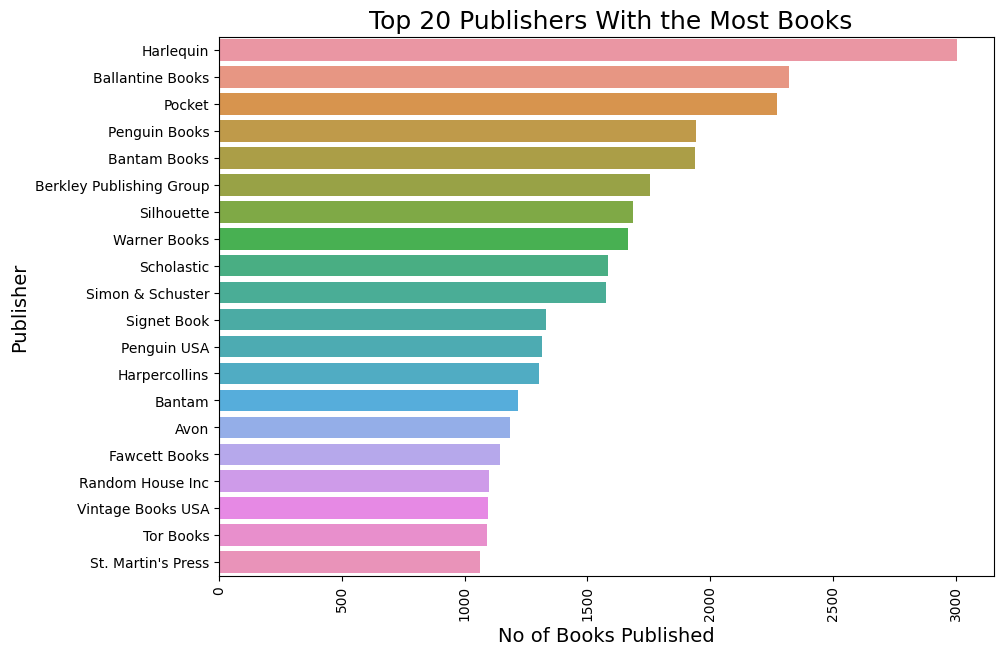

In [38]:
publisher_dict=(books['publisher'].value_counts()).to_dict()
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])

b = publisher_count_df.sort_values(by=['count'], ascending = False)
b = b.head(20)

fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'publisher' , data = b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)

plt.show()

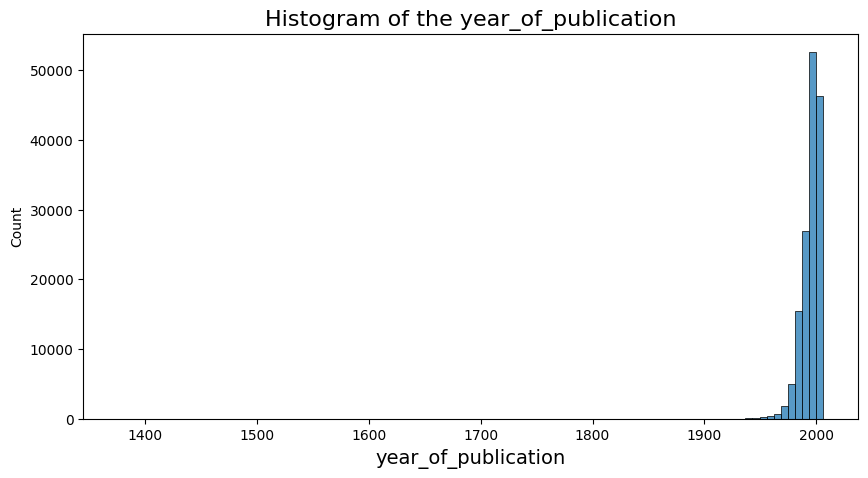

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(books['year_of_publication'],bins=100)
plt.xlabel('year_of_publication',size=14)
plt.title('Histogram of the year_of_publication',size=16)
plt.show()

In [40]:
books['summary'][0]

'In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.'

In [41]:
books['language'].value_counts()

en       78823
de        1282
es        1017
fr         883
it         123
nl          67
pt          47
da          37
ca          23
ms          10
no           6
zh-CN        3
ja           3
gl           3
ru           3
la           3
el           1
th           1
ro           1
fa           1
eo           1
gd           1
ga           1
vi           1
zh-TW        1
ko           1
Name: language, dtype: int64

In [42]:
#여기서부터는 train 데이터 분석
train.groupby(["user_id","isbn"])["rating"].mean().sort_values(ascending=False)

user_id  isbn      
51207    0446601241    10.0
131855   0553507206    10.0
185384   1576736113    10.0
51545    044023722X    10.0
185384   1576737160    10.0
                       ... 
58485    1551668572     1.0
153091   0060510315     1.0
265553   0345437764     1.0
         0375704558     1.0
64763    0375703063     1.0
Name: rating, Length: 306795, dtype: float64

In [43]:
df = train.merge(users, on='user_id', how='left').merge(books, on='isbn', how='left')

In [44]:
df.groupby(['year_of_publication', 'category']).count().iloc[:,1].to_csv("year_of_publication_category_count.csv")

In [45]:
df.groupby(['year_of_publication', 'category'])['rating'].mean().to_csv("year_of_publication_category_category_mean.csv")

In [46]:
df["rating"].value_counts()

8     73593
7     52928
9     48673
10    42774
6     25311
5     14111
1     13249
2     12929
4     12707
3     10520
Name: rating, dtype: int64

In [47]:
df.groupby("year_of_publication")["rating"].mean()

year_of_publication
1376.0     1.000000
1378.0    10.000000
1900.0     6.000000
1901.0     7.250000
1902.0     6.000000
            ...    
2001.0     7.078395
2002.0     7.126951
2003.0     7.259710
2004.0     7.338784
2005.0     7.785714
Name: rating, Length: 92, dtype: float64

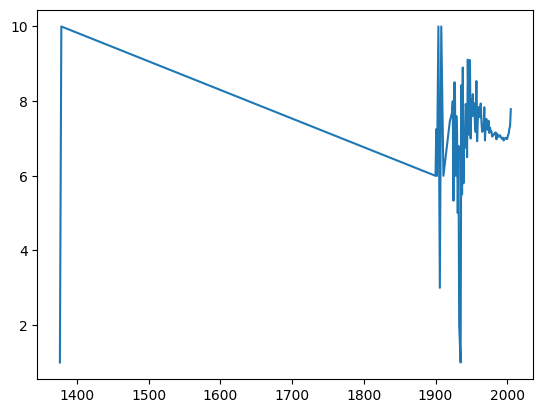

In [48]:
plt.plot(df.groupby("year_of_publication")["rating"].mean())

In [49]:
df[df["year_of_publication"] > 1800].groupby("year_of_publication")["rating"].mean().head(50)

year_of_publication
1900.0     6.000000
1901.0     7.250000
1902.0     6.000000
1904.0    10.000000
1906.0     3.000000
1908.0    10.000000
1911.0     6.000000
1920.0     7.466667
1923.0     7.692308
1924.0     8.000000
1925.0     5.333333
1926.0     8.500000
1927.0     8.500000
1928.0     6.000000
1929.0     7.600000
1930.0     7.192308
1931.0     5.000000
1932.0     6.800000
1933.0     2.000000
1935.0     1.000000
1936.0     8.428571
1937.0     5.500000
1938.0     8.900000
1939.0     5.800000
1940.0     7.111111
1941.0     6.750000
1942.0     7.923077
1943.0     7.833333
1944.0     6.500000
1945.0     9.111111
1946.0     7.550000
1947.0     7.100000
1948.0     9.100000
1949.0     7.000000
1950.0     8.055556
1951.0     7.600000
1952.0     8.189189
1953.0     7.617347
1954.0     7.942857
1955.0     7.353846
1956.0     7.170213
1957.0     8.538462
1958.0     6.928571
1959.0     7.508571
1960.0     7.838710
1961.0     7.763636
1962.0     7.568421
1963.0     7.936937
1964.0     7.475000


In [50]:
df[df["year_of_publication"] > 1800].groupby("year_of_publication")["rating"].count().head(50)

year_of_publication
1900.0      1
1901.0      4
1902.0      2
1904.0      1
1906.0      1
1908.0      3
1911.0      5
1920.0     30
1923.0     13
1924.0      1
1925.0      3
1926.0      2
1927.0      6
1928.0      2
1929.0     10
1930.0     26
1931.0      2
1932.0      5
1933.0      1
1935.0      2
1936.0      7
1937.0      4
1938.0     10
1939.0      5
1940.0     18
1941.0      4
1942.0     13
1943.0      6
1944.0      2
1945.0      9
1946.0     20
1947.0     10
1948.0     10
1949.0     12
1950.0     18
1951.0     30
1952.0     37
1953.0    196
1954.0     70
1955.0     65
1956.0     47
1957.0     91
1958.0     70
1959.0    175
1960.0    124
1961.0    110
1962.0     95
1963.0    111
1964.0    120
1965.0    185
Name: rating, dtype: int64

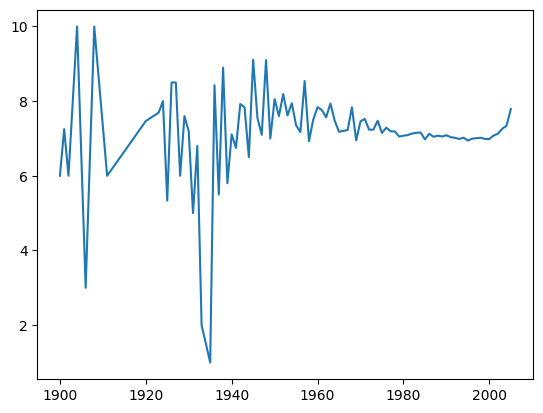

In [51]:
plt.plot(df[df["year_of_publication"] > 1800].groupby("year_of_publication")["rating"].mean())

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306795 entries, 0 to 306794
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              306795 non-null  int64  
 1   isbn                 306795 non-null  object 
 2   rating               306795 non-null  int64  
 3   location             306795 non-null  object 
 4   age                  214133 non-null  float64
 5   location_city        299787 non-null  object 
 6   location_state       290385 non-null  object 
 7   location_country     292723 non-null  object 
 8   book_title           306795 non-null  object 
 9   book_author          306795 non-null  object 
 10  year_of_publication  306795 non-null  float64
 11  publisher            306795 non-null  object 
 12  img_url              306795 non-null  object 
 13  language             187711 non-null  object 
 14  category             185574 non-null  object 
 15  summary          

In [53]:
df[df["year_of_publication"] == 1906]

,user_id,isbn,rating,location,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
289416,189835,0404089119,3,"honolulu,hawaii,usa",NaN,honolulu,hawaii,usa,Charlotte Bronte and Her Sisters,Clement K. Shorter,1906.0,Ams Pr,http://images.amazon.com/images/P/0404089119.0...,NaN,NaN,NaN,images/0404089119.01.THUMBZZZ.jpg,NaN


In [54]:
df[df["year_of_publication"] == 1933]

,user_id,isbn,rating,location,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
289874,189835,0804617279,2,"honolulu,hawaii,usa",NaN,honolulu,hawaii,usa,"Legends of Angria,",Charlotte Bronte,1933.0,Gateway/Associated Faculty Pr,http://images.amazon.com/images/P/0804617279.0...,NaN,NaN,NaN,images/0804617279.01.THUMBZZZ.jpg,NaN


In [55]:
df[df["year_of_publication"] == 1935]

,user_id,isbn,rating,location,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
282750,167790,0882436600,1,"tulsa,ok,usa",NaN,tulsa,ok,usa,Through the Bible Book by Book: Genesis to Est...,Myer Pearlman,1935.0,Gospel Publishing House,http://images.amazon.com/images/P/0882436600.0...,NaN,NaN,NaN,images/0882436600.01.THUMBZZZ.jpg,NaN
282751,167790,0882436619,1,"tulsa,ok,usa",NaN,tulsa,ok,usa,Through the Bible Book by Book: Job to Malachi...,Myer Pearlman,1935.0,Gospel Publishing House,http://images.amazon.com/images/P/0882436619.0...,en,religion,GPH Publication.,images/0882436619.01.THUMBZZZ.jpg,religion


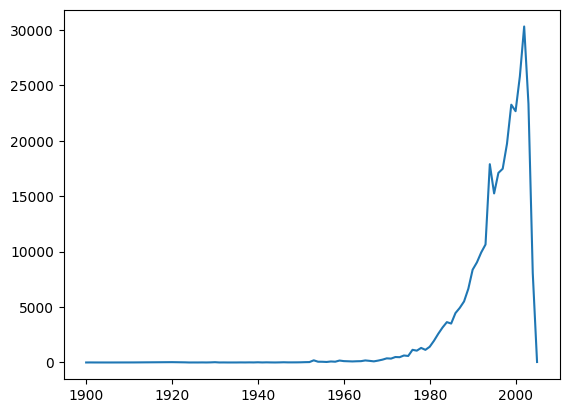

In [56]:
plt.plot(df[df["year_of_publication"] > 1800].groupby("year_of_publication")["rating"].count())

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306795 entries, 0 to 306794
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              306795 non-null  int64  
 1   isbn                 306795 non-null  object 
 2   rating               306795 non-null  int64  
 3   location             306795 non-null  object 
 4   age                  214133 non-null  float64
 5   location_city        299787 non-null  object 
 6   location_state       290385 non-null  object 
 7   location_country     292723 non-null  object 
 8   book_title           306795 non-null  object 
 9   book_author          306795 non-null  object 
 10  year_of_publication  306795 non-null  float64
 11  publisher            306795 non-null  object 
 12  img_url              306795 non-null  object 
 13  language             187711 non-null  object 
 14  category             185574 non-null  object 
 15  summary          

<AxesSubplot: >

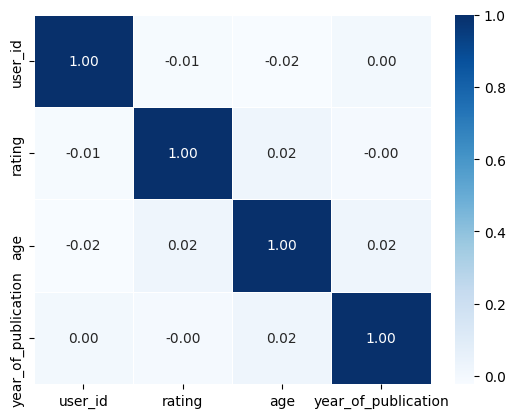

In [58]:
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [59]:
df['isbn'].apply(lambda x:x[:4]).value_counts().head(50)

0553    14782
0671    14078
0345    12332
0440    10168
0060     9689
0312     9362
0446     9349
0451     9217
0380     8518
0425     8083
0140     7931
0385     7832
0373     7585
0679     6363
0743     5497
0375     4989
0316     4716
0449     4451
0684     4011
0515     3994
0061     3849
0590     3665
0786     3486
0399     3410
0812     3396
0441     2404
0394     2350
0452     2348
0670     2081
1551     1995
0064     1855
0439     1810
0688     1721
0804     1707
3442     1572
0821     1512
0517     1439
1558     1394
1573     1381
0156     1368
0805     1368
0393     1316
0767     1244
0525     1181
0142     1160
0395     1145
0486     1088
0689     1086
0330     1058
2070     1057
Name: isbn, dtype: int64

In [60]:
df[df['isbn'].apply(lambda x: x[:4])=='0553']['publisher'].unique()

array(['Bantam Books', 'Spectra', 'Bantam Doubleday Dell', 'Bantam',
       'Spectra Books', 'Starfire', 'Crimeline', 'Bantam Classics',
       'Bantam Dell Pub Group', 'Fanfare', 'Random House Audio',
       'Skylark Books', 'Bantam Spectra', 'Bantam Books (Mm)',
       'Broadway Books', 'Loveswept', 'Laurel Leaf',
       "Random House Children's Books", 'Skylark', 'Sweet Valley',
       'Random House Childrens Pub (Mm)', 'Bank Street Press', 'Yearling',
       'Bantam Books for Young Readers', 'Bantam Skylark Book', 'Domain',
       'Random House Childrens Books', 'Crime Line',
       'Bantam Doubleday Dell Publishing Group', 'Yearling Books',
       'Transworld Publishers Ltd', 'Random House Childrens Pub',
       'Bantam Doubleday Dell Books',
       'Random House Audio Publishing Group', 'Random House',
       'Trafalgar Square Books', 'Random House Audio Voices',
       'Bantam Books-Audio', 'Smithmark Pub', 'Dell', 'Bantam Pr Ltd',
       'Doubleday Books for Young Readers', 'Tr

In [61]:
df.head()

,user_id,isbn,rating,location,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
0,8,0002005018,4,"timmins,ontario,canada",NaN,timmins,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN
1,67544,0002005018,7,"toronto,ontario,canada",30.0,toronto,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN
2,123629,0002005018,8,"kingston,ontario,canada",NaN,kingston,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN
3,200273,0002005018,8,"comber,ontario,canada",NaN,comber,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN
4,210926,0002005018,9,"guelph,ontario,canada",NaN,guelph,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN


In [62]:
df.isna().sum()

user_id                     0
isbn                        0
rating                      0
location                    0
age                     92662
location_city            7008
location_state          16410
location_country        14072
book_title                  0
book_author                 0
year_of_publication         0
publisher                   0
img_url                     0
language               119084
category               121221
summary                119084
img_path                    0
category_high          157015
dtype: int64

In [63]:
df = df.drop('location', axis=1)
df = df.drop('img_url', axis=1)
df = df.drop('category', axis=1)
df = df.drop('summary', axis=1)
df = df.drop('img_path', axis=1)
df = df.drop('category_high', axis=1)
df = df.drop('publisher', axis=1)


In [64]:
df = df.replace('na',np.nan)
df = df.replace('',np.nan)

In [65]:
df['age'] = df['age'].fillna(df['age'].mean())

In [66]:
df.head()

,user_id,isbn,rating,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language
0,8,0002005018,4,36.662462,timmins,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,en
1,67544,0002005018,7,30.000000,toronto,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,en
2,123629,0002005018,8,36.662462,kingston,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,en
3,200273,0002005018,8,36.662462,comber,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,en
4,210926,0002005018,9,36.662462,guelph,ontario,canada,Clara Callan,Richard Bruce Wright,2001.0,en


In [67]:
df= df.drop('isbn', axis=1)

In [68]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error 
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
encoder = LabelEncoder()
df.book_title = encoder.fit_transform(df.book_title)
df.location_city = encoder.fit_transform(df.location_city)
df.location_state = encoder.fit_transform(df.location_state)
df.location_country = encoder.fit_transform(df.location_country)
df.book_author = encoder.fit_transform(df.book_author)
df.language = encoder.fit_transform(df.language)

In [70]:
df.head()

,user_id,rating,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language
0,8,4,36.662462,9854,907,41,17674,43657,2001.0,4
1,67544,7,30.000000,9905,907,41,17674,43657,2001.0,4
2,123629,8,36.662462,4947,907,41,17674,43657,2001.0,4
3,200273,8,36.662462,2141,907,41,17674,43657,2001.0,4
4,210926,9,36.662462,3916,907,41,17674,43657,2001.0,4


In [71]:
df = pd.get_dummies(df)

In [72]:
df.shape

(306795, 10)

In [73]:
df.sample(5)

,user_id,rating,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language
76316,192665,7,47.000000,10137,206,269,83278,44289,2002.0,4
62593,87974,7,25.000000,3360,1205,269,76854,50582,1996.0,4
72342,271622,9,36.662462,5789,1396,17,104539,44026,2003.0,4
145810,264031,8,34.000000,9945,738,269,29706,49848,2002.0,4
74419,86567,7,20.000000,7817,817,269,12567,16342,2000.0,4


In [74]:
scaler = StandardScaler()
transformed_df = scaler.fit_transform(df)
df = pd.DataFrame(transformed_df, columns=df.columns)

In [75]:
df

,user_id,rating,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language
0,-1.690683,-1.261589,6.924705e-16,1.268209,0.436971,-2.262080,-1.237802,1.026702,0.718310,-0.799436
1,-0.851853,-0.028651,-6.493007e-01,1.283967,0.436971,-2.262080,-1.237802,1.026702,0.718310,-0.799436
2,-0.155249,0.382328,6.924705e-16,-0.247965,0.436971,-2.262080,-1.237802,1.026702,0.718310,-0.799436
3,0.796708,0.382328,6.924705e-16,-1.114968,0.436971,-2.262080,-1.237802,1.026702,0.718310,-0.799436
4,0.929023,0.793307,6.924705e-16,-0.566525,0.436971,-2.262080,-1.237802,1.026702,0.718310,-0.799436
...,...,...,...,...,...,...,...,...,...,...
306790,1.772586,-0.028651,-8.442138e-01,0.597718,-1.317106,0.493564,1.075874,-1.032473,0.853211,1.253813
306791,1.772686,-0.439630,-3.569310e-01,-1.033706,1.182642,0.493564,0.740521,0.783180,-1.170295,-0.799436
306792,1.772686,-0.028651,-3.569310e-01,-1.033706,1.182642,0.493564,1.593669,-1.153794,-1.440096,1.253813
306793,1.772686,-0.028651,-3.569310e-01,-1.033706,1.182642,0.493564,0.729929,-0.178259,0.178709,-0.799436


In [76]:
df_labels = df.rating
df_attributes = df.drop('rating', axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df_attributes, df_labels, test_size=0.3)

In [124]:
X_train

,user_id,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language
168847,1.464931,6.924705e-16,0.192643,0.434469,0.493564,-0.418067,-1.588609,-0.225993,1.253813
28267,1.132918,-1.039127e+00,1.088690,0.074145,0.493564,0.868803,1.006692,0.853211,-0.799436
198873,-1.290222,-7.467572e-01,-0.571469,0.436971,-2.262080,0.175862,0.152540,-0.091092,-0.799436
277127,1.271196,-2.594744e-01,-0.064430,-1.647403,0.493564,1.369176,-1.363524,0.853211,-0.799436
294410,0.912094,1.104918e+00,-0.374648,-0.458834,0.493564,0.575501,-0.308200,-1.440096,1.253813
...,...,...,...,...,...,...,...,...,...
91339,-1.612248,-1.620178e-01,1.574719,0.309357,0.493564,1.359050,0.584461,-0.360893,-0.799436
59175,1.435941,6.924705e-16,-0.409872,1.182642,0.493564,0.626977,1.073393,-0.091092,-0.799436
166978,-0.848984,6.924705e-16,-1.185107,-1.649905,0.493564,0.166903,1.337239,0.853211,-0.799436
87643,1.520338,-4.543875e-01,0.078011,1.182642,0.493564,-1.622763,-0.875034,0.043808,1.253813


In [126]:
X_test

,user_id,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language
140294,-0.848897,-2.403519e+00,0.705553,-1.767511,0.493564,0.746708,0.957043,0.043808,-0.799436
118302,-0.330850,3.252650e-01,-1.394288,-1.317106,0.493564,0.463211,-1.099992,-1.305196,-0.799436
91132,-1.349592,-1.721323e+00,1.052230,-1.377160,-2.262080,-1.122856,-0.989180,0.043808,-0.799436
184435,-0.133302,-2.208606e+00,-1.724898,0.204262,0.493564,-1.295143,-0.630945,0.583410,-0.799436
222760,1.714906,-1.039127e+00,0.488648,0.436971,-2.262080,-1.087868,0.723275,-1.305196,1.253813
...,...,...,...,...,...,...,...,...,...
293242,0.849930,2.761679e+00,-1.679787,1.017493,0.493564,0.467588,1.681002,0.313609,-0.799436
17924,1.392979,6.924705e-16,-0.520796,-1.079392,0.493564,1.022881,0.517949,0.313609,-0.799436
183410,-0.465774,-1.916236e+00,-0.213668,-0.298690,-1.198498,-1.557922,0.686967,0.988111,-0.799436
199137,0.522538,6.924705e-16,-1.690601,1.182642,0.493564,0.275691,-0.299705,-0.900495,-0.799436


In [127]:
y_test

140294    0.793307
118302    0.793307
91132     1.204287
184435   -2.494527
222760    0.793307
            ...   
293242    0.793307
17924    -0.028651
183410    0.793307
199137   -0.850610
87149     0.382328
Name: rating, Length: 92039, dtype: float64

In [125]:
y_train

168847   -1.261589
28267     0.382328
198873    0.382328
277127    0.793307
294410    1.204287
            ...   
91339    -1.261589
59175    -0.028651
166978    0.382328
87643     0.382328
282312    0.382328
Name: rating, Length: 214756, dtype: float64

In [79]:
k_fold = list(KFold(n_splits=5, shuffle=True).split(X_train, y_train))

In [80]:
def grid_search_best_model(model, params, k_fold, X_train, y_train):
    grid_search = GridSearchCV(model,
                           params,                             
                          cv=k_fold).fit(X_train,y_train)
    print("Best params", grid_search.best_params_)
    print("Best estimator", grid_search.best_estimator_)
    print("Best score:", grid_search.best_score_)
    
    return grid_search.best_estimator_

In [81]:
model_results = {}

def score_model(model,X_train, X_test, y_train, y_test,
               show_plot=True):   
    y_pred = model.predict(X_test)  
    print(f"Training score: {model.score(X_train,y_train)}")
    print(f"Test score: {r2_score(y_test, y_pred)}")
    print("MSE: ", mean_squared_error(y_test, y_pred))
    
    predictions_comparision = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}).sample(25)
    if show_plot == True:
        predictions_comparision.plot(kind="bar", figsize=(12,8),title="Actual vs predicted values")
    print(predictions_comparision.sample(10))    
    
    
    return {
        "training_score": model.score(X_train,y_train),
        "test_score_r2" : r2_score(y_test, y_pred),
        "test_score_mse" : mean_squared_error(y_test, y_pred)
    }

In [82]:
def compare_results():
    for key in model_results:
        print("Regression: ", key)
        print("Trainign score", model_results[key]["training_score"])
        print("R2 Test score ", model_results[key]["test_score_r2"])
        print("MSE Test score ", model_results[key]["test_score_mse"])
        print()

Best params {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 0.3, 'min_samples_leaf': 5, 'n_estimators': 200}
Best estimator GradientBoostingRegressor(max_depth=10, max_features=0.3, min_samples_leaf=5,
                          n_estimators=200)
Best score: 0.13026651083249968
Training score: 0.3014313739855474
Test score: 0.13801330665693567
MSE:  0.8619339946746359
         Actual  Predicted
18563 -0.028651  -0.050614
49374  0.382328   0.573250
86375  0.793307   0.010763
9038  -1.261589  -0.269209
24025 -1.672568  -1.780394
35084 -2.083548  -0.188207
21886  0.793307  -0.195746
48169 -0.028651   0.025578
13128  0.382328   0.057523
60100  1.204287  -1.109031


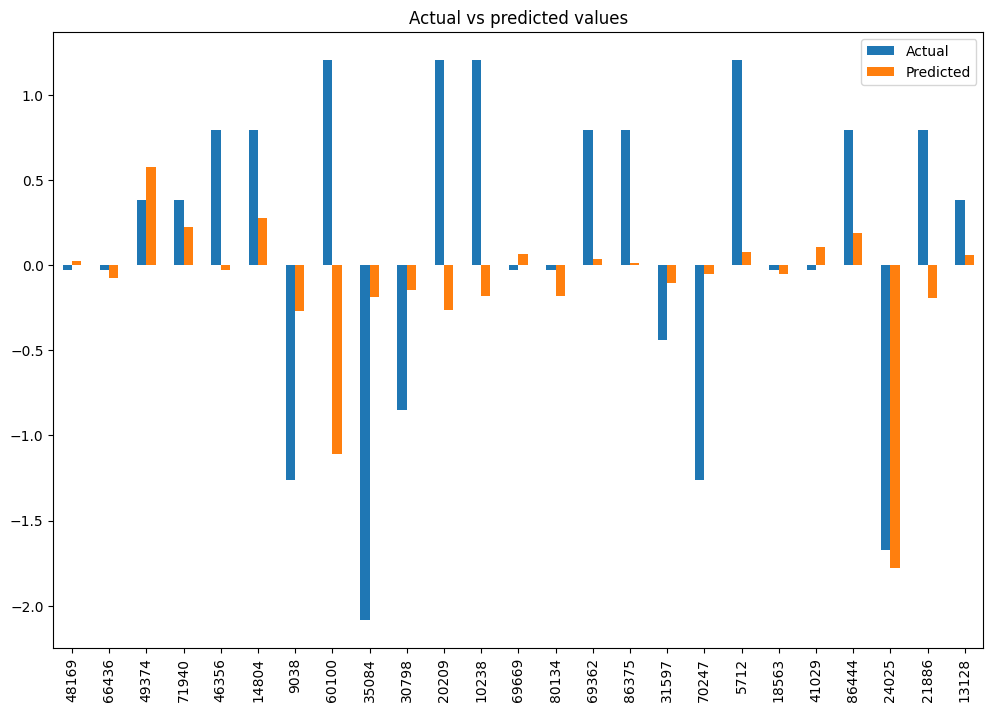

In [84]:
params={"n_estimators":[20, 50, 100,200], 
        "learning_rate": [0.01, 0.05, 0.1, 0.3],
         "max_depth":[3,5,10], 
        "min_samples_leaf": [3,5],
          "max_features": [0.3, 1]
       }        

gbr = grid_search_best_model(GradientBoostingRegressor(), params,k_fold, X_train, y_train)
model_results["gbr"] = score_model(gbr, X_train, X_test, y_train, y_test)

In [85]:
test.head()

,user_id,isbn,rating
0,11676,0002005018,0
1,116866,0002005018,0
2,152827,0060973129,0
3,157969,0374157065,0
4,67958,0399135782,0


In [98]:
df.head()

,user_id,rating,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language
0,8,-1.261589,6.924705e-16,1.268209,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436
1,8,-0.028651,-6.493007e-01,1.283967,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436
2,8,0.382328,6.924705e-16,-0.247965,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436
3,8,0.382328,6.924705e-16,-1.114968,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436
4,8,0.793307,6.924705e-16,-0.566525,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436


In [113]:
df.user_id = train.user_id

In [114]:
df.head()

,user_id,rating,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language
0,8,-1.261589,6.924705e-16,1.268209,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436
1,67544,-0.028651,-6.493007e-01,1.283967,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436
2,123629,0.382328,6.924705e-16,-0.247965,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436
3,200273,0.382328,6.924705e-16,-1.114968,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436
4,210926,0.793307,6.924705e-16,-0.566525,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436


In [119]:
df['isbn'] = 0

In [120]:
df.head()

,user_id,rating,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language,isbn
0,8,-1.261589,6.924705e-16,1.268209,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436,0
1,67544,-0.028651,-6.493007e-01,1.283967,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436,0
2,123629,0.382328,6.924705e-16,-0.247965,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436,0
3,200273,0.382328,6.924705e-16,-1.114968,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436,0
4,210926,0.793307,6.924705e-16,-0.566525,0.436971,-2.26208,-1.237802,1.026702,0.71831,-0.799436,0


In [121]:
df.isbn = train.isbn

In [123]:
df.sample(5)

,user_id,rating,age,location_city,location_state,location_country,book_title,book_author,year_of_publication,language,isbn
71743,91647,-0.028651,1.202374e+00,-0.370322,0.547070,0.493564,0.243737,-0.899763,0.718310,-0.799436,0515131083
174046,136491,0.793307,-1.818779e+00,0.766113,0.204262,0.493564,0.455011,0.811748,-0.495793,1.253813,0590457217
293127,203820,-0.439630,-5.518441e-01,1.649492,1.628042,0.046376,-1.242967,1.224917,0.583410,1.253813,8476308469
289066,189392,0.382328,-1.039127e+00,-0.002943,1.567988,0.493564,0.736232,-1.256803,0.718310,-0.799436,0375701036
56736,206423,-0.439630,6.924705e-16,-1.118058,-0.038456,0.493564,-0.794478,-1.145173,0.988111,-0.799436,0425190641


In [ ]:
test_labels = test.rating
test_attribute = test.drop('rating', axis=1)